In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 

chose_data = 'full_data.csv'
#chose_data = 'significant_data_05.csv'


C:\Users\THINKPAD\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)

the number of sample: 180495


In [3]:
# split train/test set into 0.75:0.25 (3:1)
#train_set = data.iloc[:int(total_data*0.75)]
#test_set = data.iloc[int(total_data*0.75):]

In [4]:
#train_y, train_X = train_set['Late_delivery_risk'], train_set.drop(columns=['Late_delivery_risk'])
#test_y, test_X = test_set['Late_delivery_risk'], test_set.drop(columns=['Late_delivery_risk'])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Late_delivery_risk', axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.5)

In [6]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)

In [7]:
rf.feature_importances_

array([1.45038622e-02, 2.69145063e-04, 3.17447479e-04, 1.56619538e-03,
       1.36072552e-03, 2.79956416e-04, 4.99594985e-04, 1.71996803e-04,
       3.91265323e-04, 1.98322538e-04, 2.42988834e-04, 3.56989239e-04,
       4.23280510e-04, 3.25694014e-04, 4.14604510e-04, 1.58243384e-03,
       3.10545705e-03, 5.80136327e-01, 1.34958524e-04, 3.84695579e-01,
       9.02317520e-03])

In [8]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[35685  5091]
 [  501 48971]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     40776
           1       0.91      0.99      0.95     49472

    accuracy                           0.94     90248
   macro avg       0.95      0.93      0.94     90248
weighted avg       0.94      0.94      0.94     90248

0.932510102444022


<Figure size 432x288 with 0 Axes>

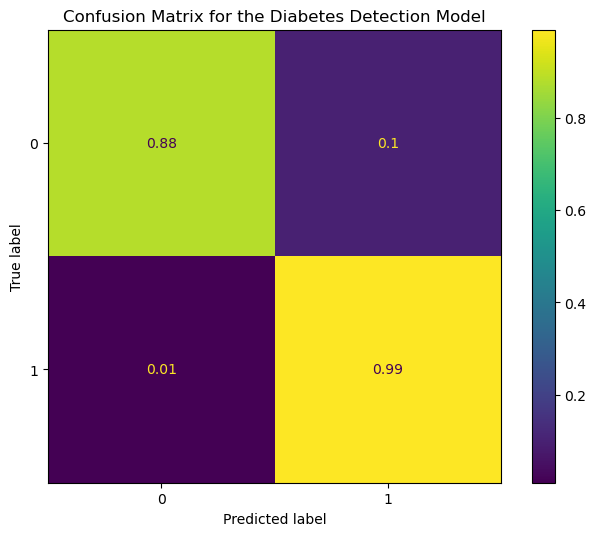

In [12]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('t.png')


In [13]:

data.keys()

Index(['Unnamed: 0', 'Benefit per order', 'Sales per customer', 'Latitude',
       'Longitude', 'Order Item Discount', 'Category Id',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Category Id',
       'Late_delivery_risk', 'order_weekday', 'shipping_weekday', 'time_delta',
       'market_int', 'shipping_mode_int', 'type'],
      dtype='object')

In [14]:
rf.feature_importances_

array([1.45038622e-02, 2.69145063e-04, 3.17447479e-04, 1.56619538e-03,
       1.36072552e-03, 2.79956416e-04, 4.99594985e-04, 1.71996803e-04,
       3.91265323e-04, 1.98322538e-04, 2.42988834e-04, 3.56989239e-04,
       4.23280510e-04, 3.25694014e-04, 4.14604510e-04, 1.58243384e-03,
       3.10545705e-03, 5.80136327e-01, 1.34958524e-04, 3.84695579e-01,
       9.02317520e-03])

In [15]:
from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

In [16]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)

In [17]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[37935  2841]
 [ 1429 48043]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     40776
           1       0.94      0.97      0.96     49472

    accuracy                           0.95     90248
   macro avg       0.95      0.95      0.95     90248
weighted avg       0.95      0.95      0.95     90248

0.9507208184347844


In [10]:
xgb.feature_importances_

array([0.02478503, 0.09210464, 0.08715743, 0.02296281, 0.02559703,
       0.02444382, 0.03085499, 0.0445023 , 0.5617424 , 0.08584961],
      dtype=float32)

*logistic regression


In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)


[[ 1880 38952]
 [ 2237 47179]]
              precision    recall  f1-score   support

           0       0.46      0.05      0.08     40832
           1       0.55      0.95      0.70     49416

    accuracy                           0.54     90248
   macro avg       0.50      0.50      0.39     90248
weighted avg       0.51      0.54      0.42     90248

0.5003867904396074


0.5455693818077055

*SVM

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6057641166563248


Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, x_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)